In [4]:
import os
import gpxpy
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import to_rgba as to_rgba

In [5]:
def rgb2hex(rgb):
    rgb = [hex(int(256*x)) for x in rgb]
    r, g, b = [str(x)[2:] for x in rgb]
    return "{}{}{}".format(r, g, b)




def process_gpx_to_df(file_name):
    gpx = gpxpy.parse(open(file_name)) 
 #(1)make DataFrame
    track = gpx.tracks[0]
    segment = track.segments[0]
     # Load the data into a Pandas dataframe (by way of a list)
    data = []
    segment_length = segment.length_3d()
    for point_idx, point in enumerate(segment.points):
        data.append([point.longitude, point.latitude,point.elevation, point.time, segment.get_speed(point_idx)])
    columns = ['Longitude', 'Latitude', 'Altitude', 'Time', 'Speed']
    gpx_df = pd.DataFrame(data, columns=columns)
 
 #2(make points tuple for line)
    points = []
    for track in gpx.tracks:
        for segment in track.segments: 
            for point in segment.points:
                points.append(tuple([point.latitude, point.longitude]))

    return gpx_df, points

In [6]:
def add_gpx_to_map(file_name, mymap):
    df, points = process_gpx_to_df(file_name)
    folium.PolyLine(points, weight=4.5, opacity=.5).add_to(mymap)
    return mymap, df

def add_gpx_speeds_to_map(file_name, mymap):
    df, points = process_gpx_to_df(file_name)
    speeds = df['Speed']
    colors = [cmap(sp)[:3] if sp is not None else cmap(0)[:3] for sp in speeds] # keep rgb and drop the "a" column

#    speeds = [sp if sp is not None else 0 for sp in speeds]
#    rgb_values = to_rgba(speeds)[:, :3] # keep rgb and drop the "a" column
#    print(rgb_values)
    #colors = [rgb2hex(rgb) for rgb in rgb_values]
    for point, color, speed in zip(points, colors, speeds):
        print(color)
        folium.CircleMarker(location=point,
                            radius=1.25,
                            popup=str(speed),
                            fill_color=color).add_to(mymap)
    return mymap, df


In [7]:
mymap = folium.Map( location=[ 45.188, 5.72], zoom_start=9, tiles=None)
folium.TileLayer('openstreetmap', name='OpenStreet Map').add_to(mymap)

In [8]:
import tkinter as tk
from tkinter import filedialog

root = tk.Tk()
root.withdraw()

file_path = filedialog.askopenfilename(multiple=True)
for file in file_path:
    _, df = add_gpx_to_map(file, mymap)

In [6]:
for file in os.listdir('traces/'):
    _, df = add_gpx_to_map('traces/' + file, mymap)


In [9]:
mymap

In [7]:
cm.viridis(0)

(0.267004, 0.004874, 0.329415, 1.0)

In [8]:
cmap = lambda x: cm.viridis(np.array(x) / 30.)

In [9]:
df, points = process_gpx_to_df('traces/' + '08_mai_15h13_-_17h21.gpx')
speeds = df['Speed']
speeds  = [sp if sp is not None else 0 for sp in speeds]
speeds
colors = [cmap(sp)[:3] if sp is not None else cmap(0)[:3] for sp in speeds] # keep rgb and drop the "a" column


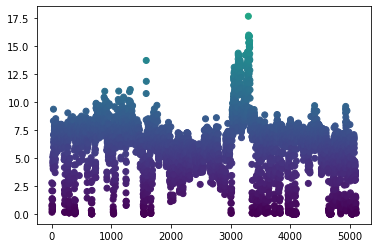

In [10]:
plt.scatter(x=range(len(speeds)), y=speeds, c=colors)

In [70]:
colors

['482173',
 '48196c',
 '4695d',
 '44255',
 '45558',
 '471164',
 '471164',
 '46b5e',
 '4685b',
 '45357',
 '45357',
 '45558',
 '4565a',
 '4695d',
 '47f62',
 '48196c',
 '482071',
 '453480',
 '443a83',
 '46317e',
 '453681',
 '443a83',
 '433c84',
 '443882',
 '462f7d',
 '472e7c',
 '453581',
 '37588c',
 '33628d',
 '3c4e8a',
 '3f4788',
 '433e85',
 '414287',
 '3e4989',
 '414287',
 '443a83',
 '433b84',
 '404588',
 '3c4e8a',
 '3c4f8a',
 '3d4d8a',
 '3c4e8a',
 '3c4e8a',
 '3b518b',
 '39548c',
 '39548c',
 '39558c',
 '39548c',
 '3a528b',
 '3a538b',
 '3a538b',
 '3a528b',
 '3c4f8a',
 '3d4d8a',
 '404588',
 '453581',
 '472b7a',
 '46307e',
 '443882',
 '443882',
 '433c84',
 '414186',
 '3f4788',
 '3c4e8a',
 '3d4d8a',
 '3a528b',
 '365b8d',
 '38568c',
 '3b518b',
 '3c4e8a',
 '3d4d8a',
 '3c4e8a',
 '3c4e8a',
 '3b508b',
 '3a528b',
 '3c4f8a',
 '3d4d8a',
 '3c4e8a',
 '3c4f8a',
 '39548c',
 '38578c',
 '38568c',
 '3a538b',
 '3c4e8a',
 '3d4b8a',
 '3d4b8a',
 '3d4b8a',
 '3f4788',
 '404688',
 '3e4989',
 '404688',
 '423f85',